In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [52]:
eng_data=pd.read_csv("E:\\10xAccademy_Practice\\Week 1\\Data\\OutlierRemved_telecoData_outliers.csv")
eng_data.head(5)

,bearer_id,start,start_ms,end,end_ms,dur._(ms),imsi,msisdn/number,imei,last_location_name,...,youtube_dl_(bytes),youtube_ul_(bytes),netflix_dl_(bytes),netflix_ul_(bytes),gaming_dl_(bytes),gaming_ul_(bytes),other_dl_(bytes),other_ul_(bytes),total_ul_(bytes),total_dl_(bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,14.416352,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,16.578971,14.732334,15.919515,16.083116,19.443428,16.478853,18.961518,15.991897,17.419642,19.548462
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,14.126741,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,16.823537,16.765813,16.724508,16.661996,20.226918,13.973120,20.082529,16.527230,17.800791,20.297677
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,14.124290,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,16.797431,16.503329,16.682716,15.634140,19.251782,12.888235,19.833356,15.254341,17.143551,19.449612
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,14.094285,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,16.878346,16.533289,16.454185,13.908948,20.499545,16.199650,20.434303,16.364743,17.584222,20.556064
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,13.900779,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,16.540705,16.757994,16.656025,12.936559,20.084052,15.076752,20.126718,16.448142,17.467280,20.159635


In [53]:
df=eng_data.copy()

In [54]:

#Calculte the presence of null Values
df.isnull().sum().sum()

0

In [55]:
# calculate the number of Duplicate value
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   bearer_id                                 150001 non-null  float64
 1   start                                     150001 non-null  object 
 2   start_ms                                  150001 non-null  float64
 3   end                                       150001 non-null  object 
 4   end_ms                                    150001 non-null  float64
 5   dur._(ms)                                 150001 non-null  float64
 6   imsi                                      150001 non-null  float64
 7   msisdn/number                             150001 non-null  float64
 8   imei                                      150001 non-null  float64
 9   last_location_name                        150001 non-null  object 
 10  avg_rtt_dl_(ms)     

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


<AxesSubplot:xlabel='total_dl_(bytes)'>

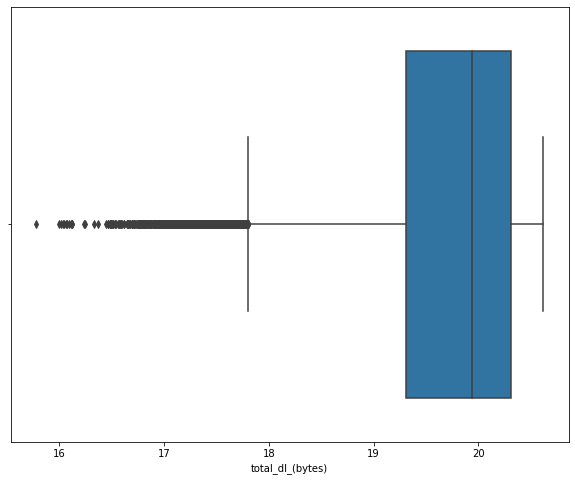

In [56]:
# Check the presence of outlier using box plot
plt.figure(figsize=(10,8))
sns.boxplot(df["total_dl_(bytes)"],orient="vert")

In [ ]:
# The Above box plot shows there is very small outliers, so actual data modelling can be done.

# Get the total data used by each application

In [57]:
#total data of google
df["google_total"]=df["google_dl_(bytes)"]+df["google_ul_(bytes)"]
#df["google_total"]

In [58]:
#total data of google
df["google_total"]=df["google_dl_(bytes)"]+df["google_ul_(bytes)"]
#Total data used by Email
df["email_total"]=df["email_dl_(bytes)"]+df["email_ul_(bytes)"]
#Total data used by Youtube
df["youtube_total"]=df["youtube_dl_(bytes)"]+df["youtube_ul_(bytes)"]
#Total data used by Netflix
df["netflix_total"]=df["netflix_dl_(bytes)"]+df["netflix_ul_(bytes)"]
#Total data used by Email
df["email_total"]=df["email_dl_(bytes)"]+df["email_ul_(bytes)"]
#Total data used by gaming
df["gaming_total"]=df["gaming_dl_(bytes)"]+df["gaming_ul_(bytes)"]
#Total data used by Other
df["other_total"]=df["other_dl_(bytes)"]+df["other_ul_(bytes)"]
#Total data used by Social Media
df["social_media_total"]=df["social_media_dl_(bytes)"]+df["social_media_ul_(bytes)"]
#Total data used by Total
df["Total_Data"]=df["total_dl_(bytes)"]+df["total_ul_(bytes)"]

In [65]:
# Rename bearer_id to session_id
df = df.rename( columns={'bearer_id': 'session_id'})
# Rename msisdn/number to MSISDN_Number
df=df.rename(columns={"msisdn/number":"MSISDN_Number"})
df

,session_id,start,start_ms,end,end_ms,dur._(ms),imsi,MSISDN_Number,imei,last_location_name,...,total_ul_(bytes),total_dl_(bytes),google_total,email_total,youtube_total,netflix_total,gaming_total,other_total,social_media_total,Total_Data
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,14.416352,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,17.419642,19.548462,28.362490,26.919548,31.311305,32.002631,35.922280,34.953415,24.354187,36.968104
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,14.126741,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,17.800791,20.297677,28.798852,25.990915,33.589349,33.386505,34.200038,36.609760,23.347978,38.098468
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,14.124290,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,17.143551,19.449612,30.302333,28.224568,33.300760,32.316856,32.140017,35.087697,24.987458,36.593162
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,14.094285,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,17.584222,20.556064,30.856214,27.535407,33.411636,30.363133,36.699195,36.799046,22.876560,38.140286
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,13.900779,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,17.467280,20.159635,29.869166,26.542356,33.298699,29.592584,35.160804,36.574860,24.491238,37.626915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,11.305040,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,17.869534,20.168445,30.966144,24.320555,32.880513,33.494420,36.116381,31.415888,25.918963,38.037979
149997,7.349883e+18,4/29/2019 7:28,483.0,4/30/2019 10:41,187.0,11.492417,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,17.482530,20.317774,29.214809,26.513169,32.376114,33.652106,35.626786,35.098602,23.605224,37.800304
149998,1.311448e+19,4/29/2019 7:28,283.0,4/30/2019 10:46,810.0,11.495260,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,17.368348,20.200345,29.985303,27.423405,31.370016,31.552498,36.542185,34.853750,23.609891,37.568692
149999,1.311448e+19,4/29/2019 7:28,696.0,4/30/2019 10:40,327.0,11.491804,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,17.204166,19.734125,30.335531,27.958466,31.924621,31.409802,34.424188,34.675267,23.572987,36.938291


In [29]:
df["session_id"]

0         1.311448e+19
1         1.311448e+19
2         1.311448e+19
3         1.311448e+19
4         1.311448e+19
              ...     
149996    7.277826e+18
149997    7.349883e+18
149998    1.311448e+19
149999    1.311448e+19
150000    7.349883e+18
Name: session_id, Length: 150001, dtype: float64

# Aggregate Each user to session Count, Duration and Total data consumed for each application

In [95]:
UserEngagement=df.groupby("MSISDN_Number").agg({"session_id":"count","dur._(ms)":"sum","Total_Data": "sum"})
UserEngagement.head(10)

,session_id,dur._(ms),Total_Data
MSISDN_Number,,,
3.360100e+10,1,11.667533,37.952551
3.360100e+10,1,12.107522,36.011203
3.360100e+10,1,11.812800,37.624373
3.360101e+10,1,10.817335,36.639432
3.360101e+10,2,19.656666,75.943057
3.360101e+10,2,23.503676,72.688300
3.360101e+10,2,22.138894,73.968552
3.360101e+10,1,11.366731,36.967502
3.360101e+10,2,24.692915,74.967991


# Top 10 per Engagement Metrics

In [107]:
# Top 10 users per Session Frequency
EngagementPer_session_Frequency = UserEngagement.nlargest(10, "session_id")['session_id']
# Top 10 users per Session Duration
EngagementPer_session_Duration=UserEngagement.nlargest(10,"dur._(ms)")["dur._(ms)"]
# Top 10 users per Session Total Data
EngagementPer_session_TotalData=UserEngagement.nlargest(10,"Total_Data")["Total_Data"]

In [108]:
# Convert the Session metrics into data frame
user_session_Dataframe=pd.DataFrame()
user_session_Dataframe['User_ID'] = EngagementPer_session_Frequency.index
user_session_Dataframe['session_id'] = EngagementPer_session_Frequency.values

Session_durations_df = pd.DataFrame()
Session_durations_df['User_ID'] = EngagementPer_session_Duration.index
Session_durations_df['Duration_MS '] = EngagementPer_session_Duration.values

TotalData_df = pd.DataFrame()
TotalData_df['User_ID'] = EngagementPer_session_TotalData.index
TotalData_df['Total_Data'] = EngagementPer_session_TotalData.values

In [109]:
user_session_Dataframe.head()


,User_ID,session_id
0,3.362632e+10,18
1,3.361489e+10,17
2,3.362578e+10,17
3,3.365973e+10,16
4,3.367588e+10,15


In [110]:
Session_durations_df.head()


,User_ID,Duration_MS
0,3.362578e+10,233.413129
1,3.362632e+10,231.977427
2,3.361489e+10,222.446521
3,3.365973e+10,198.016024
4,3.376054e+10,195.767900


In [111]:
TotalData_df.head()

,User_ID,Total_Data
0,3.362632e+10,667.707948
1,3.362578e+10,634.698734
2,3.361489e+10,633.565683
3,3.365973e+10,592.952528
4,3.376054e+10,562.221591


[]

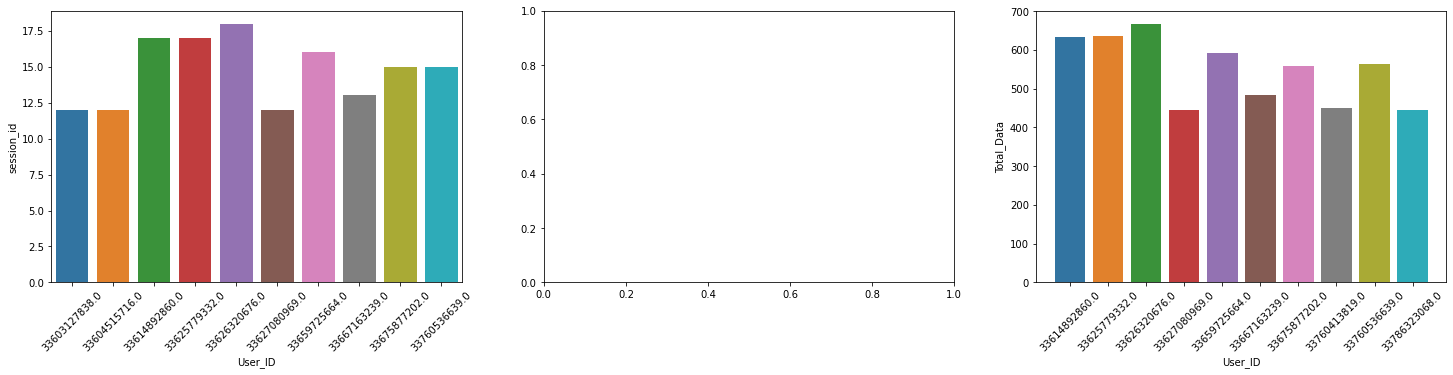

In [114]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
ax1 = sns.barplot(data=user_session_Dataframe, x='User_ID', orient='v', y='session_id', ax=axes[0])
#ax2 = sns.barplot(data=Session_durations_df, x='User_ID',orient='v', y='Duration_MS', ax=axes[1])
ax3 = sns.barplot(data=TotalData_df, x='User_ID',orient='v', y='Total_Data', ax=axes[2])


ax1.set_xticklabels(ax1.xaxis.get_majorticklabels(), rotation=45)
#ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(), rotation=45)
ax3.set_xticklabels(ax3.xaxis.get_majorticklabels(), rotation=45)
plt.plot()

In [ ]:
# As shown Above one presentation dominated the presentation. So, treated as outlier and remove.

In [105]:
UserEngagement.drop(33663706799.0, axis=0, inplace=True)

# Normalize Engagement Metrics

In [103]:
from sklearn.preprocessing import Normalizer

def normalizer(df, columns):
    norm = Normalizer()
    # normalize the exponential data with boxcox
    normalized_data = norm.fit_transform(df)

    # plot both together to compare
    fig, ax=plt.subplots(1,2, figsize=(10, 6))
    sns.histplot(df, ax=ax[0])
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1])
    ax[1].set_title("Normalized data")
    return pd.DataFrame(norm.fit_transform(df), columns=columns)

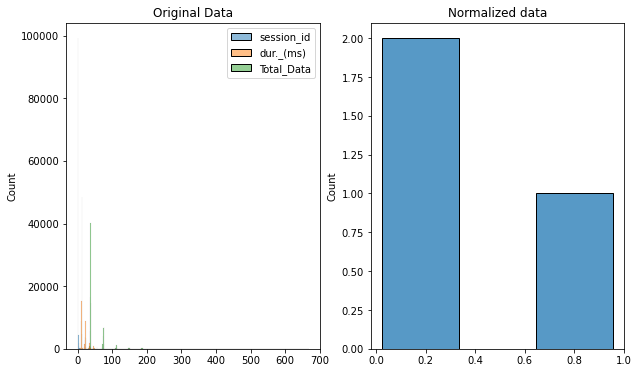

In [116]:
normalized_user_engagement = normalizer(UserEngagement, ['session_id', 'dur._(ms)', 'Total_Data'] )

In [117]:
normalized_user_engagement.head()

,session_id,dur._(ms),Total_Data
0,0.025177,0.293759,0.955548
1,0.026312,0.318575,0.947532
2,0.025350,0.299453,0.953774
3,0.026167,0.283058,0.958746
4,0.025487,0.250495,0.967782


In [118]:
normalized_user_engagement.describe()

,session_id,dur._(ms),Total_Data
count,106855.000000,106855.000000,106855.000000
mean,0.025714,0.290363,0.956384
std,0.000504,0.018112,0.005407
min,0.024454,0.226974,0.930108
25%,0.025351,0.281301,0.952876
50%,0.025624,0.292597,0.955891
75%,0.025979,0.302272,0.959275
max,0.028807,0.366379,0.973566


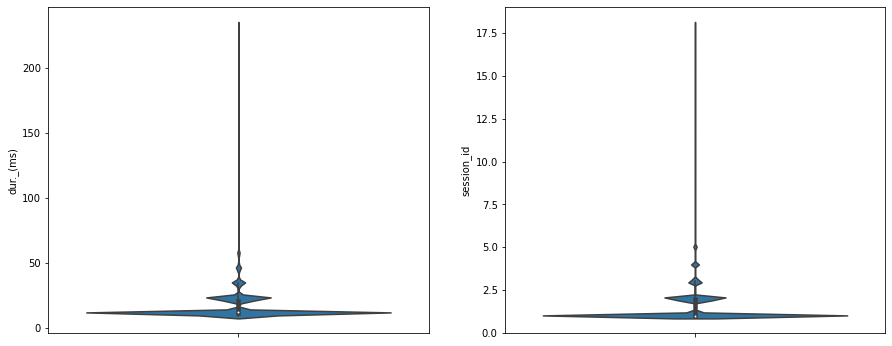

In [123]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.violinplot(y=UserEngagement["dur._(ms)"])
# sns.boxplot(y=user_engagement["dur._(ms)"], color="red")
plt.subplot(1,2,2)
sns.violinplot(y=UserEngagement["session_id"])
# sns.boxplot(y=user_engagement["total_data"])
plt.show()



# Perform K-Means Clustering with K=3

In [127]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_user_engagement)
identified_clusters = kmeans.fit_predict(normalized_user_engagement)# these are the labels
#centroids = kmeans.cluster_centers_

array([0, 1, 0, ..., 1, 1, 1])

In [139]:
centroids = kmeans.cluster_centers_
lables_unique = np.unique(identified_clusters)


array([0, 1, 2])

In [160]:
normalized_user_engagement

,session_id,dur._(ms),Total_Data
0,0.025177,0.293759,0.955548
1,0.026312,0.318575,0.947532
2,0.025350,0.299453,0.953774
3,0.026167,0.283058,0.958746
4,0.025487,0.250495,0.967782
...,...,...,...
106850,0.025941,0.235640,0.971494
106851,0.025539,0.302801,0.952711
106852,0.025632,0.350760,0.936115
106853,0.025026,0.311357,0.949964


# Three Cluster plot for Data Points

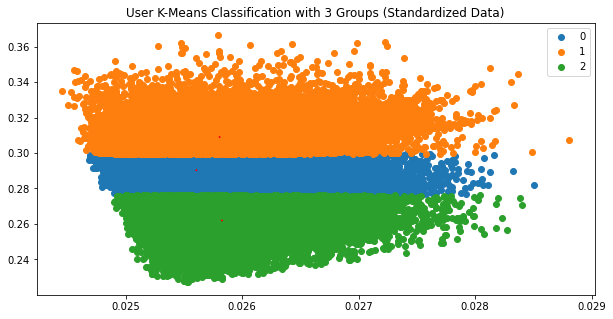

In [151]:
lables_unique = np.unique(label)
#plotting the results:
plt.figure(figsize=(10,5))
plt.title('User K-Means Classification with 3 Groups (Standardized Data)')
for i in lables_unique:
    plt.scatter(normalized_user_engagement[label == i].iloc[:,0] , normalized_user_engagement[label == i].iloc[:,1], marker='o', label = i,
               )
plt.scatter(centroids[:,0] , centroids[:,1],centroids[:,2], marker='x', color = 'red')
plt.legend()
plt.show()




# minimum, maximum, average & total non- normalized metrics for each cluster

In [157]:
dataframe_Cluster=pd.DataFrame()
dataframe_Cluster["index"]=normalized_user_engagement.index.values
dataframe_Cluster["cluster"]=kmeans.labels_

In [159]:
dataframe_Cluster.cluster.value_counts()

0    51944
1    33314
2    21597
Name: cluster, dtype: int64

In [166]:
UserEngage_df=UserEngagement.copy()
UserEngage_df.head()

,session_id,dur._(ms),Total_Data
MSISDN_Number,,,
3.360100e+10,1,11.667533,37.952551
3.360100e+10,1,12.107522,36.011203
3.360100e+10,1,11.812800,37.624373
3.360101e+10,1,10.817335,36.639432
3.360101e+10,2,19.656666,75.943057


In [168]:
UserEngage_df.insert(0, 'cluster', kmeans.labels_)
UserEngage_df.head(5)

,cluster,session_id,dur._(ms),Total_Data
MSISDN_Number,,,,
3.360100e+10,0,1,11.667533,37.952551
3.360100e+10,1,1,12.107522,36.011203
3.360100e+10,0,1,11.812800,37.624373
3.360101e+10,0,1,10.817335,36.639432
3.360101e+10,2,2,19.656666,75.943057


In [ ]:
# Clusters are 3. so, 0,1 and 2 are clusters make their overview

In [170]:
cluster1 = UserEngage_df[UserEngage_df["cluster"]==0]
cluster1.head()

,cluster,session_id,dur._(ms),Total_Data
MSISDN_Number,,,,
3.360100e+10,0,1,11.667533,37.952551
3.360100e+10,0,1,11.812800,37.624373
3.360101e+10,0,1,10.817335,36.639432
3.360101e+10,0,2,22.138894,73.968552
3.360101e+10,0,1,11.366731,36.967502


In [174]:
cluster2 = UserEngage_df[UserEngage_df["cluster"]==1]
cluster2.head(5)

,cluster,session_id,dur._(ms),Total_Data
MSISDN_Number,,,,
3.360100e+10,1,1,12.107522,36.011203
3.360101e+10,1,2,23.503676,72.688300
3.360101e+10,1,2,24.692915,74.967991
3.360102e+10,1,1,12.422892,35.576051
3.360102e+10,1,1,12.398002,37.286797


In [173]:
cluster3 = UserEngage_df[UserEngage_df["cluster"]==2]
cluster3.head()

,cluster,session_id,dur._(ms),Total_Data
MSISDN_Number,,,,
3.360101e+10,2,2,19.656666,75.943057
3.360102e+10,2,1,10.556229,37.885559
3.360103e+10,2,1,10.449989,37.065504
3.360103e+10,2,1,9.988977,37.627324
3.360103e+10,2,2,20.700662,75.876494


In [181]:
cluster3.describe()

,cluster,session_id,dur._(ms),Total_Data
count,21597.0,21597.000000,21597.000000,21597.000000
mean,2.0,1.249433,12.706728,46.676741
std,0.0,0.490666,5.149128,18.326833
min,2.0,1.000000,8.873748,33.855789
25%,2.0,1.000000,9.922751,37.186630
50%,2.0,1.000000,10.326105,37.748760
75%,2.0,1.000000,10.822475,38.334037
max,2.0,7.000000,74.685922,263.095992


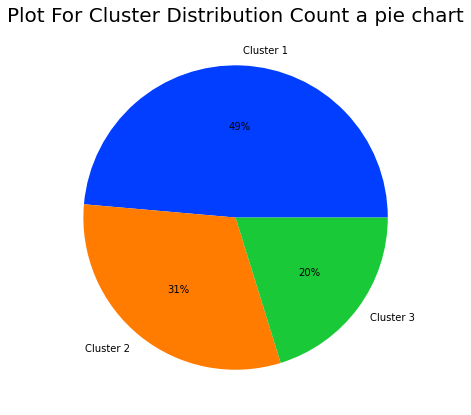

In [180]:
data = [cluster1.session_id.count(), cluster2.session_id.count(), cluster3.session_id.count()]
keys = ['Cluster 1', 'Cluster 2', 'Cluster 3']
plt.figure(figsize=(12, 7))
colors = sns.color_palette('bright')
plt.pie(data, labels=keys, colors=colors, autopct='%.0f%%')
plt.title("Plot For Cluster Distribution Count a pie chart", size=20)
plt.show()


# Total traffic per application Aggregation 

In [187]:
df.dtypes

session_id            float64
start                  object
start_ms              float64
end                    object
end_ms                float64
                       ...   
netflix_total         float64
gaming_total          float64
other_total           float64
social_media_total    float64
Total_Data            float64
Length: 63, dtype: object

In [240]:
Total_Traffic_Aggregation=df.groupby("MSISDN_Number").agg({'google_total':'sum','email_total':'sum','youtube_total':'sum',
                                                          'netflix_total':'sum','gaming_total':'sum','other_total':'sum','social_media_total':'sum',
                                                          })
Total_Traffic_Aggregation

,google_total,email_total,youtube_total,netflix_total,gaming_total,other_total,social_media_total
MSISDN_Number,,,,,,,
3.360100e+10,28.886711,26.748271,32.238131,32.788024,34.642406,35.812062,24.758478
3.360100e+10,29.194096,27.934743,31.264510,29.717111,34.974170,34.030799,25.805627
3.360100e+10,26.531873,28.258763,31.345269,31.475514,36.180352,35.723909,25.733266
3.360101e+10,30.731634,26.165886,30.060477,27.534749,34.707784,33.165518,22.704073
3.360101e+10,60.823188,53.460940,63.649461,64.349061,70.313658,71.318676,48.636766
...,...,...,...,...,...,...,...
3.379000e+10,29.192118,26.256508,32.656413,28.410670,35.229296,34.664492,23.459775
3.379000e+10,29.393481,21.235442,32.010315,30.037566,35.928164,34.820827,23.938975
3.197021e+12,30.403346,27.071495,30.668889,32.755307,35.335906,34.825549,24.162892


In [241]:
Total_Traffic_Aggregation.columns.max()

'youtube_total'

# Get the Top 10 Users of an Application

In [251]:
Google_data_Agg=Total_Traffic_Aggregation.nlargest(10,'google_total')['google_total']
Email_data_Agg=Total_Traffic_Aggregation.nlargest(10,'email_total')['email_total']
YouTube_data_Agg=Total_Traffic_Aggregation.nlargest(10,'youtube_total')['youtube_total']
Netflix_data_Agg=Total_Traffic_Aggregation.nlargest(10,'netflix_total')['netflix_total']
Gaming_data_Agg=Total_Traffic_Aggregation.nlargest(10,'gaming_total')['gaming_total']
Other_data_Agg=Total_Traffic_Aggregation.nlargest(10,'other_total')['other_total']
SocialMedia_data_Agg=Total_Traffic_Aggregation.nlargest(10,'social_media_total')['social_media_total']

# Convert Aggregates into dataFrame

In [252]:
SocialMedia_data_Agg.head(5)

MSISDN_Number
3.362632e+10    442.860677
3.361489e+10    413.240394
3.362578e+10    404.350462
3.365973e+10    394.552274
3.376054e+10    367.325727
Name: social_media_total, dtype: float64

In [228]:
SocialMedia_data_Agg.drop(33659725664.0, axis=0, inplace=True)

In [253]:
#Convert Google data into data frame
Google_Agg_DF=pd.DataFrame()
Google_Agg_DF["UserId"]=Google_data_Agg.index
Google_Agg_DF["google_total"]=Google_data_Agg.values
# Convert Email data to DataFrame
Email_data_DF=pd.DataFrame()
Email_data_DF["UserId"]=Email_data_Agg.index
Email_data_DF["email_total"]=Email_data_Agg.values
#convert YouTube data to dataFrame
YouTube_data_DF=pd.DataFrame()
YouTube_data_DF["UserId"]=YouTube_data_Agg.index
YouTube_data_DF["youtube_total"]=YouTube_data_Agg.values

# Convert Netflix data to data Frame
Netflix_data_DF=pd.DataFrame()
Netflix_data_DF["UserId"]=Netflix_data_Agg.index
Netflix_data_DF["netflix_total"]=Netflix_data_Agg.values
#convert Gaming Data to DataFrame
Gaming_data_DF=pd.DataFrame()
Gaming_data_DF["UserId"]=Gaming_data_Agg.index
Gaming_data_DF["gaming_total"]=Gaming_data_Agg.values
#Convert Social Media data to DataFrame
SocialMedia_data_DF=pd.DataFrame()
SocialMedia_data_DF["UserId"]=Gaming_data_Agg.index
SocialMedia_data_DF["social_media_total"]=Gaming_data_Agg.values
#Convert Other media data to DataFrame
Other_data_DF=pd.DataFrame()
Other_data_DF["UserId"]=Other_data_Agg.index
Other_data_DF["other_total"]=Other_data_Agg.values

In [254]:
SocialMedia_data_DF.head(5)


,UserId,social_media_total
0,3.362632e+10,633.332525
1,3.362578e+10,602.272621
2,3.361489e+10,597.649557
3,3.365973e+10,558.948230
4,3.376054e+10,533.910237


In [226]:
Other_data_DF.head(10) 

,UserId,other_total
0,3.366371e+10,37557.372693
1,3.362632e+10,634.936095
2,3.362578e+10,601.204842
3,3.361489e+10,595.427778
4,3.365973e+10,559.612507
5,3.367588e+10,534.210258
6,3.376054e+10,516.657601
7,3.366716e+10,453.449280
8,3.360313e+10,425.729121
9,3.362708e+10,421.732448


[]

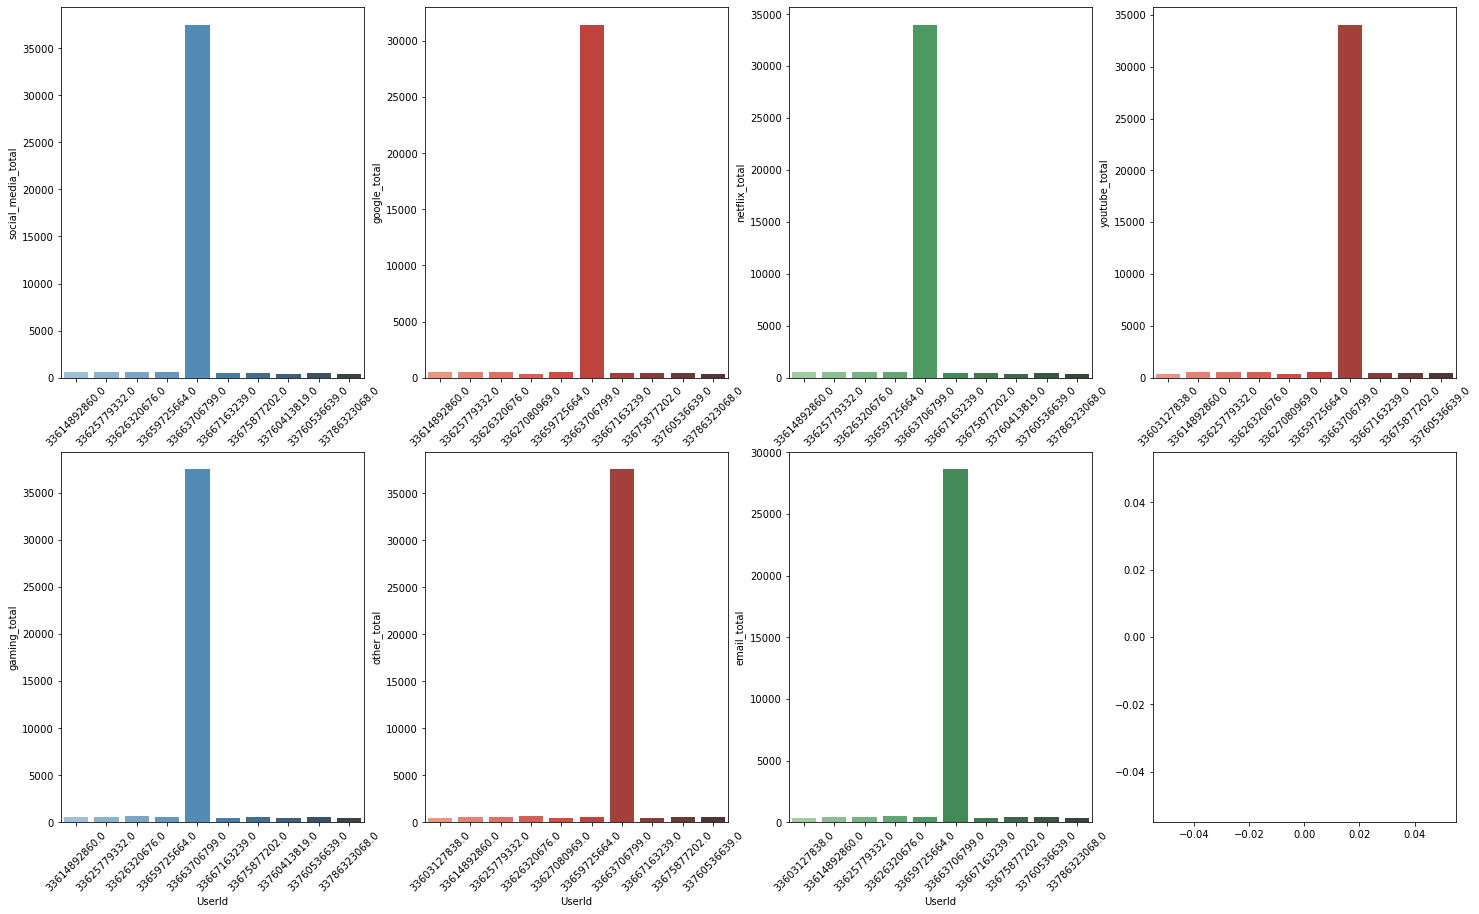

In [246]:
fig, axes = plt.subplots(2, 4, figsize=(25, 15))
socialMedia_plot = sns.barplot(data=SocialMedia_data_DF, x='UserId', orient='v', y='social_media_total', ax=axes[0,0], palette='Blues_d')
GoogleMedia_plot = sns.barplot(data=Google_Agg_DF, x='UserId',orient='v', y='google_total', ax=axes[0,1], palette='Reds_d')
Netflixdata_plot = sns.barplot(data=Netflix_data_DF, x='UserId',orient='v', y='netflix_total', ax=axes[0,2], palette='Greens_d')
YouTubeData_plot = sns.barplot(data=YouTube_data_DF, x='UserId',orient='v', y='youtube_total', ax=axes[0,3], palette='Reds_d')
GamingData_plot = sns.barplot(data=Gaming_data_DF, x='UserId',orient='v', y='gaming_total', ax=axes[1,0], palette='Blues_d')
OtherData_plot = sns.barplot(data=Other_data_DF, x='UserId',orient='v', y='other_total', ax=axes[1,1], palette='Reds_d')
EmailData_plot = sns.barplot(data=Email_data_DF, x='UserId',orient='v', y='email_total', ax=axes[1,2], palette='Greens_d')
socialMedia_plot.set_xticklabels(socialMedia_plot.xaxis.get_majorticklabels(), rotation=45)
GoogleMedia_plot.set_xticklabels(GoogleMedia_plot.xaxis.get_majorticklabels(), rotation=45)
Netflixdata_plot.set_xticklabels(Netflixdata_plot.xaxis.get_majorticklabels(), rotation=45)
YouTubeData_plot.set_xticklabels(YouTubeData_plot.xaxis.get_majorticklabels(), rotation=45)
GamingData_plot.set_xticklabels(GamingData_plot.xaxis.get_majorticklabels(), rotation=45)
OtherData_plot.set_xticklabels(OtherData_plot.xaxis.get_majorticklabels(), rotation=45)
EmailData_plot.set_xticklabels(EmailData_plot.xaxis.get_majorticklabels(), rotation=45)
plt.plot()

In [ ]:
#the Above Presentation were Dominated with single Outlier Value, so to remove it use below command
Total_Traffic_Aggregation.drop(33663706799.0, axis=0, inplace=True)

[]

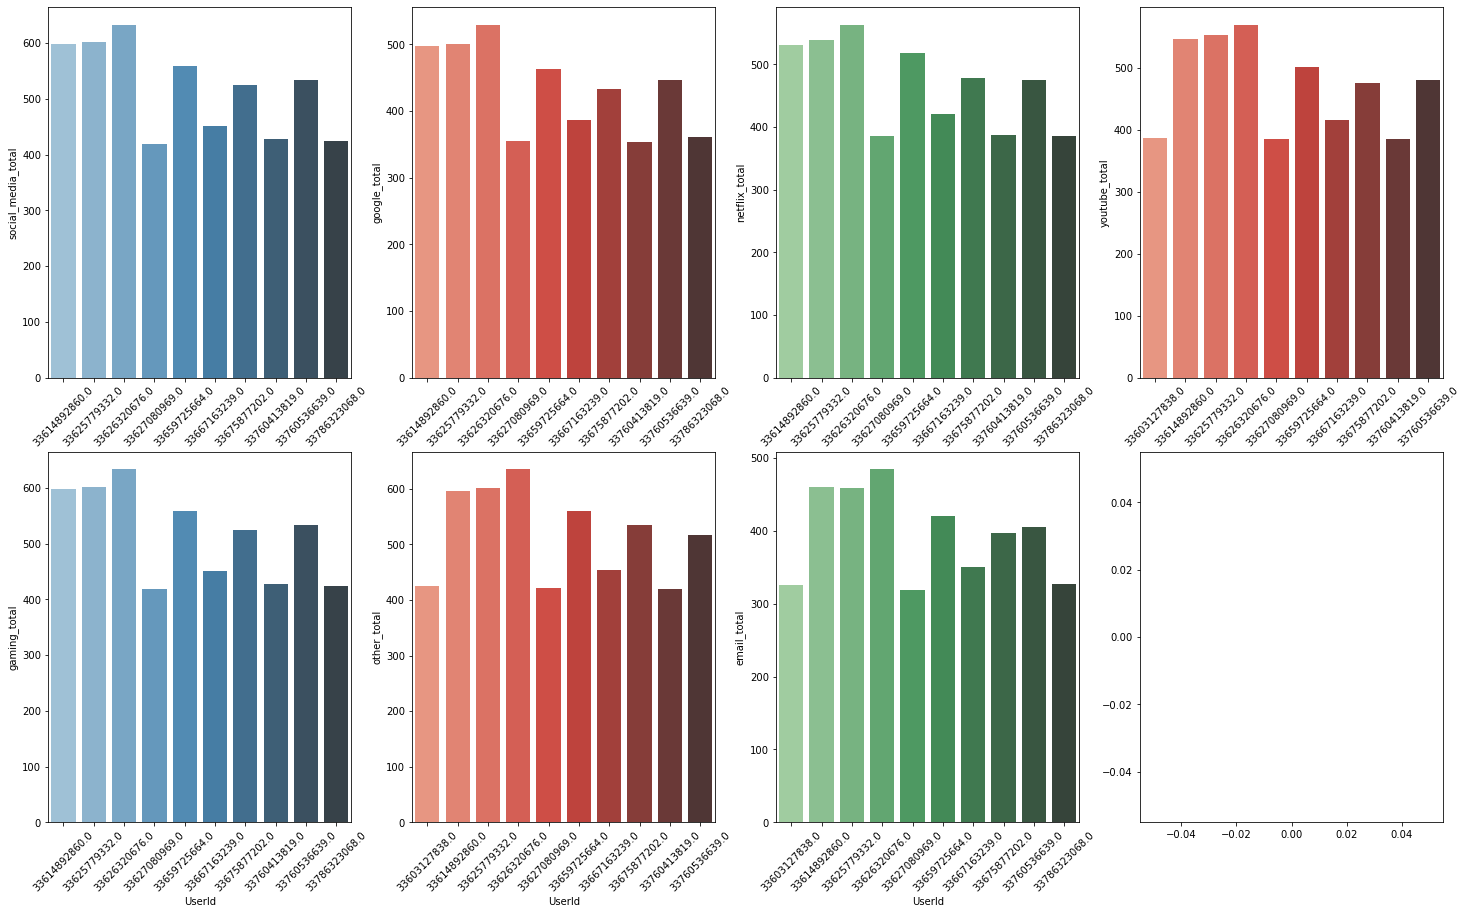

In [255]:
fig, axes = plt.subplots(2, 4, figsize=(25, 15))
socialMedia_plot = sns.barplot(data=SocialMedia_data_DF, x='UserId', orient='v', y='social_media_total', ax=axes[0,0], palette='Blues_d')
GoogleMedia_plot = sns.barplot(data=Google_Agg_DF, x='UserId',orient='v', y='google_total', ax=axes[0,1], palette='Reds_d')
Netflixdata_plot = sns.barplot(data=Netflix_data_DF, x='UserId',orient='v', y='netflix_total', ax=axes[0,2], palette='Greens_d')
YouTubeData_plot = sns.barplot(data=YouTube_data_DF, x='UserId',orient='v', y='youtube_total', ax=axes[0,3], palette='Reds_d')
GamingData_plot = sns.barplot(data=Gaming_data_DF, x='UserId',orient='v', y='gaming_total', ax=axes[1,0], palette='Blues_d')
OtherData_plot = sns.barplot(data=Other_data_DF, x='UserId',orient='v', y='other_total', ax=axes[1,1], palette='Reds_d')
EmailData_plot = sns.barplot(data=Email_data_DF, x='UserId',orient='v', y='email_total', ax=axes[1,2], palette='Greens_d')
socialMedia_plot.set_xticklabels(socialMedia_plot.xaxis.get_majorticklabels(), rotation=45)
GoogleMedia_plot.set_xticklabels(GoogleMedia_plot.xaxis.get_majorticklabels(), rotation=45)
Netflixdata_plot.set_xticklabels(Netflixdata_plot.xaxis.get_majorticklabels(), rotation=45)
YouTubeData_plot.set_xticklabels(YouTubeData_plot.xaxis.get_majorticklabels(), rotation=45)
GamingData_plot.set_xticklabels(GamingData_plot.xaxis.get_majorticklabels(), rotation=45)
OtherData_plot.set_xticklabels(OtherData_plot.xaxis.get_majorticklabels(), rotation=45)
EmailData_plot.set_xticklabels(EmailData_plot.xaxis.get_majorticklabels(), rotation=45)
plt.plot()

# Plot Three Most Used Applications

In [256]:
most_UsedTotal=Total_Traffic_Aggregation.sum()
most_UsedTotal.head(10)

google_total          4.391648e+06
email_total           3.997219e+06
youtube_total         4.746610e+06
netflix_total         4.745968e+06
gaming_total          5.238909e+06
other_total           5.237872e+06
social_media_total            -inf
dtype: float64

In [257]:
#Display Top 3
Top_Used=most_UsedTotal.nlargest(3)
Top_Used

gaming_total     5.238909e+06
other_total      5.237872e+06
youtube_total    4.746610e+06
dtype: float64

In [274]:
Top_Used.values

array([5238909.02604377, 5237872.25900656, 4746610.02948139])

In [ ]:
Plot Top 3 Used Applications using Piechart

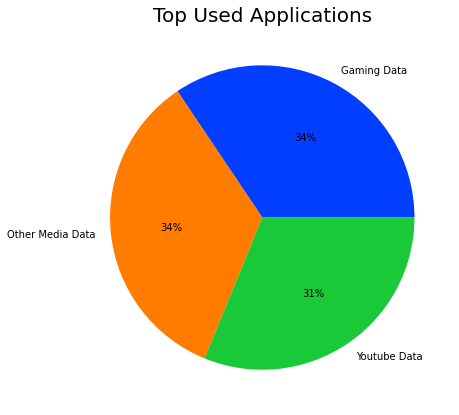

In [283]:
keys=["Gaming Data", "Other Media Data", "Youtube Data"]
#keys = ['Cluster 1', 'Cluster 2', 'Cluster 3']
plt.figure(figsize=(12, 7))
colors = sns.color_palette('bright')
plt.pie(Top_Used, labels=keys, colors=colors, autopct='%.0f%%')
plt.title("Top Used Applications", size=20)
plt.show()

# Use Bar Chart to Plot

[]

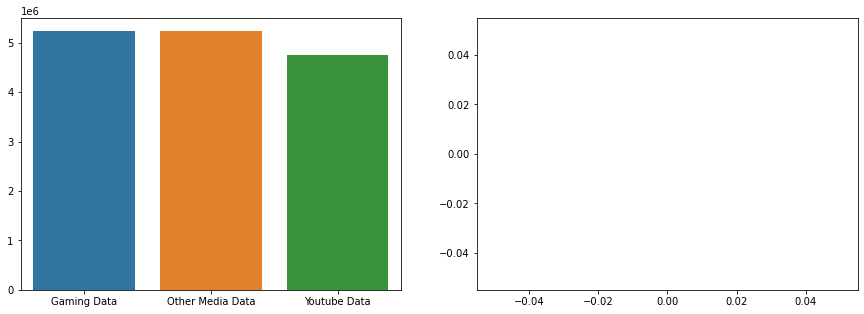

In [287]:
keys=["Gaming Data", "Other Media Data", "Youtube Data"]
fig, axes = plt.subplots(1,2, figsize=(15, 5))
ax1 = sns.barplot(data=Top_Used, x=keys, orient='v', y=Top_Used.values, ax=axes[0])
plt.plot()

# K-Means Clustering on User Engagement

In [289]:
inertias = []
for i in range(1,16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(normalized_user_engagement)
    inertias.append(kmeans.inertia_)

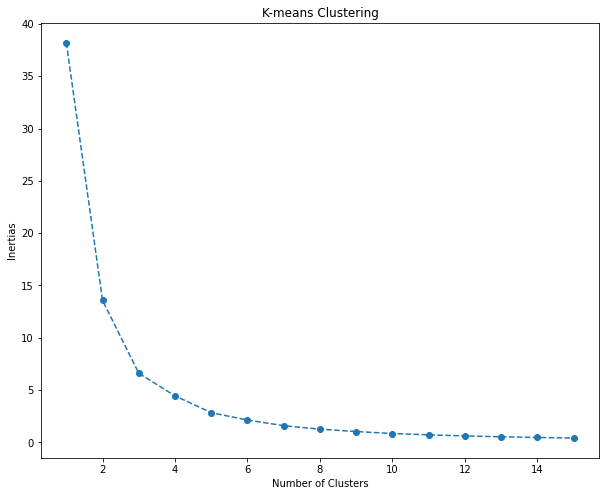

In [291]:
# Plotting the cluster size vs. inertia graph to find the optimal cluster
plt.figure(figsize = (10,8))
plt.plot(range(1, 16), inertias, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.title('K-means Clustering')
plt.show()

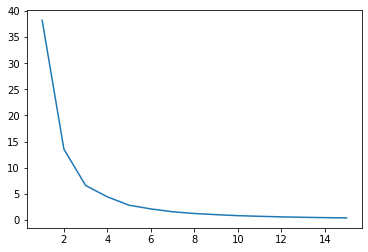

In [296]:
wcss = []

for i in range(1, 16):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(normalized_user_engagement)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = range(1, 16), y = wcss);

# apply Elbow method

In [ ]:
# As shown from the Above elbow method, the appropriate number of clusters is K=3, this is because the optimal value 
is found from the point where the elbow bends

# Save KNN Model

In [305]:
import pickle

with open("E:\\10xAccademy_Practice\\Week 1\\User Engagement Analysis\\KNN Model\\UserEngagement_KNN_Model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

In [ ]:
UserEngagement

In [306]:
normalized_user_engagement.to_csv('E:\\10xAccademy_Practice\\Week 1\\User Engagement Analysis\\Processed_Data\\Normalized_UserEngagement_data.csv')

In [309]:
UserEngage_df.to_csv('E:\\10xAccademy_Practice\\Week 1\\User Engagement Analysis\\Processed_Data\\UserEngagement_data.csv')

In [132]:
labels=kmeans.labels_

array([0, 1, 0, ..., 1, 1, 1])

In [138]:
import numpy as np
kmeans = KMeans(init="random",n_clusters=3,n_init=10,max_iter=300,random_state=42)
label = kmeans.fit_predict(normalized_user_engagement)
centroids = kmeans.cluster_centers_


lables_unique = np.unique(label)
lables_unique


array([0, 1, 2])